Grade=100/100

Abstract

Through completion of this lab, the frequentist method of determining the probability distribution function (PDF) of the binomial and Poisson distributions was illustrated.  The results of the frequentist method were graphed against the distributions's function to confirm that the results were reasonable.  The expected value of the results of the frequentist method was calculated and compared to the mean of the binomial distribution to quantitatively confirm the similarities.  The variance of the Poisson distribution was also calculated and found to be equal to the mean of the distribution.  A chi-squared value comparing the frequentist result to the model distribution was calculated and further established that the frequentist result is a good fit to the equation for the distribution, when enough trials are conducted.  



Introduction

The first part of the lab was meant to demonstrate the frequentist approach to determining the binomial probability distribution.  This was done initially with code meant to simulate a given number of coin flips and counting the number of heads, or successes.  The process of counting the number of heads had to be repeated a large number of times so a probability could be determined that a toss would result in a given number of heads.  This result was then plotted against the equation of the binomial PDF, $B(n) = p^n(1-p)^{N-n} {N! \over n!(N-n)!}$, to compare the results.  The expectation value, $E[x] =\sum_{i=0}^N xP(x)$, was calculated for the frequentist method and compared to the mean predicted by the binomial distribution, $ \lambda = Np$.  

The second part of the lab demonstrated that as $ p \rightarrow 0$, the binomial distribution is approximated by the Poisson distribution, $Pois(n) = {\lambda^{n}e^{-\lambda} \over n!}$.  This involved changing the frequentist method to allow for a probability other than 50%.  The variance of the Poisson distribution, $ \sigma^2 = E[x^2] - E[x]^2$, was also calculated and used to generate a chi-squared value, $ \chi^2 = \sum {(O-E) \over \sigma^2} $, comparing the frequentist result to the Poisson PDF.  The variance was also compared against the mean and shown to be the same, as a Poisson distribution is defined.  


Methods and Results

The first block of code imports all the libraries that will be needed for the lab.  The functions used to generate the frequentist result and both PDFs are also defined.  The results of the frequentist method are divided by the number of trials so the sum over all values is 1, as a probability distribution is usually defined.  This also makes for easy comparison to the binomial and Poisson probability distributions.  The frequentist method and binomial PDF are set to use a default probability of 0.5, similar to that of the coin flip part of the lab.  The Poisson distribution is defined with an alternate equation, $Pois(n) = exp[n*ln\lambda - \lambda - ln\Gamma(n+1)]$ that produces the same result, but excludes the $\lambda^n$ and $n!$ terms which can cause rounding errors as $n$ becomes large.  

In [1]:
import numpy as np
import scipy.misc as mis
import scipy.special as sp
import matplotlib.pyplot as plt
%matplotlib inline

def binomialProb(trials, prob = 0.5):
    num_success = np.zeros(trials+1)
    for i in np.arange(trials*50):
        my_rands = np.random.uniform(0,1,trials)
        result = int(np.sum(my_rands<prob))
        num_success[result] = num_success[result]+1
    return num_success/(trials*50)

def binDist(N, prob = 0.5):
    n = np.arange(N+1)
    return (prob**n)*(1-prob)**(N-n)*mis.factorial(N)/(mis.factorial(n)*mis.factorial(N-n))

def poissonDist(lambd, N):
    n = np.arange(N+1)
    return np.exp(n*np.log(lambd)-lambd - sp.gammaln(n+1))
#Uses alternate definition of Poisson distribution to avoid lambda^n term and n! terms

9.997


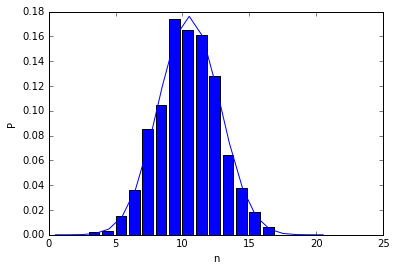

In [2]:
trials = 20

x = np.arange(trials+1)
y_norm = binomialProb(trials)
y_act = binDist(trials)

plt.bar(x,y_norm) 
plt.plot(x+0.5,y_act)
plt.ylabel('P')
plt.xlabel('n')

print(sum(x*y_norm)) #Calculate mean of frequentist generated binomial distribution for N=20

The first graph shows the frequentist results for flipping 20 coins, bars, plotted against the binomial distribution, line.  As can be seen the frequentist method does not perfectly reproduce the binomial distribution, but the same general trend is clear.  The frequentist method could be made to fit better by increasing the number of times the 20 coin flip is simulated.  The expectation value of the frequentist method is also calculated and seen to be very close to the expected mean of 10. 

In [3]:
trials = 40

x = np.arange(trials+1)
y_norm = binomialProb(trials)
print(sum(x*y_norm)) #Mean for N=40

20.024


The above code repeats the expected value calculation for 40 coin flips.  The result is again seen to be very close to the expected result of $20 = 40*0.5$

(0, 20)

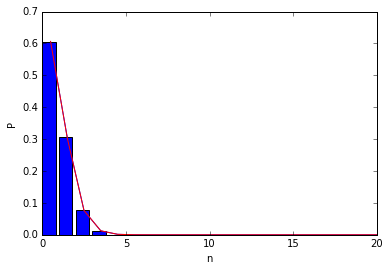

In [4]:
trials = 100
prob = 0.005

x = np.arange(trials+1)
y_norm = binomialProb(trials, prob)
y_act = binDist(trials, prob)
y_pois = poissonDist(trials*prob, trials)

plt.bar(x,y_norm)
plt.plot(x+0.5,y_act, 'b-')
plt.plot(x+0.5,y_pois, 'r-')
plt.ylabel('P')
plt.xlabel('n')
plt.xlim(0,20)

The second figure illustrates that as $ p \rightarrow 0$, the frequentist method reproduces a Poisson distribution very well.  The binomial distribution is also plotted and is also nearly identical to the Poisson distribution, as only one line can be seen.

In [5]:
var = sum(x**2*y_pois) - sum(x*y_pois)**2 #Calculates standard deviation
print var 

print sum((y_norm-y_pois)**2/var)# Calculate chi-squared of frequentist generated data compared to Poisson function

0.5
4.51058048976e-05


The variance of the Poisson distribution is calculated above and seen to be equal to the mean of the distribution $0.5=100*0.005$ as expected.  A chi-squared value is also calculated and seen to be very close to zero indicating a very good fit for the frequentist data to the Poisson distribution. 

Conclusion

Through the first figure, one can see that the frequentist method of simulating coin flips produces the results expected, matching the binomial distribution.  The second figure shows that the frequentist method also reproduces a Poisson distribution when the probability of a success is low, which is also nearly identical to the binomial distribution.  Expectation values of the frequentist generated data were also compared to the expected binomial mean, giving a quantitative measure of the similarities of the results.  Similarily for the Poisson distribution, the similarity was quantitaively shown through the low chi-squared value calculated.  The mean and variance of the Poisson distribution were also shown to be the same.  